# Course 6 Automatidata

***

## Project Description

You are the newest member of Automatidata’s data analytics team. Your team is more than halfway through their project for the New York City Taxi & Limousine Commission (TLC). Earlier, you completed a project proposal, used Python to explore and analyze the TLC dataset, created data visualizations, and conducted an A/B test. Now, the New York City TLC wants your team to build a multiple linear regression (MLR) model for ride durations based on a variety of variables.

The New York City TLC is impressed with your work so far. Now, they want your team to identify which variables or factors influence the amount of gratuity a rider gives a driver. Your work will help TLC stakeholders make informed business decisions that will increase gratuities and improve driver satisfaction. 

At a meeting with New York City TLC stakeholders, your team suggests building a random forest model to predict whether or not a rider will be a generous tipper (>= 20%). At the end of the meeting, Titus Nelson, the Operations Manager at the New York City TLC, says that he will share the suggestion with his organization's leadership team. 

## Data Dictionary

| Field          | Description                                                                           |
|----------------|---------------------------------------------------------------------------------------|
| ID |	Trip identification number |
| VendorID |	A code indicating the TPEP provider that provided the record.  |
| tpep_pickup_datetime |	The date and time when the meter was engaged. |
| tpep_dropoff_datetime |	The date and time when the meter was disengaged. |
| Passenger_count |The number of passengers in the vehicle	|
| Trip_distance | The elapsed trip distance in miles reported by the taximeter.	|
| PULocationID | TLC Taxi Zone in which the taximeter was engaged.	|
| DOLocationID | TLC Taxi Zone in which the taximeter was disengaged.	|
| RateCodeID | The final rate code in effect at the end of the trip	|
| Store_and_fwd_flag | This flag indicates whether the trip record was held in vehicle memory before being sent to the vendor	|
| Payment_type  | A numeric code signifying how the passenger paid for the trip	|
| Fare_amount | The time-and-distance fare calculated by the meter.	|
| Extra  | Miscellaneous extras and surcharges	|
| MTA_tax |	0.50 MTA tax that is automatically triggered based on the metered  rate in use |
| Improvement_surcharge |	0.30 improvement surcharge assessed trips at the flag drop |
| Tip_amount |	Tip amount – This field is automatically populated for credit card  tips. Cash tips are not included. |
| Tolls_amount |	Total amount of all tolls paid in trip. |
| Total_amount |	The total amount charged to passengers. Does not include cash tips. |

## Data sources used

This project uses a dataset called Automatidata_data.csv. It contains data gathered by the New York City Taxi & Limousine Commission. For each trip, there are many different data variables gathered. 

## Import Libraries

In [1]:
import numpy as np
from numpy import count_nonzero, median, mean
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random


import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols


import datetime
from datetime import datetime, timedelta


import sklearn
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import cross_validate, KFold, RepeatedStratifiedKFold
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler, OneHotEncoder
#from sklearn.pipeline import Pipeline
#from sklearn.feature_selection import RFE, RFECV, SelectKBest, f_classif, f_regression, chi2
#from sklearn.inspection import permutation_importance

from sklearn.tree import export_graphviz, plot_tree
from sklearn.metrics import confusion_matrix, classification_report, mean_absolute_error, mean_squared_error,r2_score
from sklearn.metrics import plot_confusion_matrix, plot_precision_recall_curve, plot_roc_curve, accuracy_score
from sklearn.metrics import auc, f1_score, precision_score, recall_score, roc_auc_score

#from sklearn.experimental import enable_hist_gradient_boosting
##from sklearn.linear_model import ElasticNet, Lasso, LinearRegression, LogisticRegression, Ridge
#from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, ExtraTreeClassifier, ExtraTreeRegressor, plot_tree
#from sklearn.svm import SVC, SVR, LinearSVC, LinearSVR
#from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, ExtraTreesClassifier, ExtraTreesRegressor
#from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor, HistGradientBoostingClassifier, HistGradientBoostingRegressor



%matplotlib inline
#sets the default autosave frequency in seconds
%autosave 60 
sns.set_style('dark')
sns.set(font_scale=1.2)

plt.rc('axes', labelsize=14)
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)


#from tpot import TPOTClassifier, TPOTRegressor
#from imblearn.under_sampling import RandomUnderSampler
#from imblearn.over_sampling import RandomOverSampler
#from imblearn.over_sampling import SMOTE

import warnings
warnings.filterwarnings('ignore')

# import pickle
# from pickle import dump, load

# Use Folium library to plot values on a map.
# import folium

# Use Feature-Engine library

import feature_engine
from feature_engine import imputation as mdi
from feature_engine.outliers import Winsorizer
#from feature_engine import categorical_encoders as ce
#from feature_engine.discretisation import EqualWidthDiscretiser, EqualFrequencyDiscretiser
#from feature_engine.discretisation import ArbitraryDiscretiser, DecisionTreeDiscretiser
#from feature_engine.encoding import OrdinalEncoder



#from pycaret.classification import *
#from pycaret.clustering import *
#from pycaret.regression import *

pd.set_option('display.max_columns',None)
#pd.set_option('display.max_rows',100)
pd.set_option('display.width', 1000)
pd.set_option('display.float_format','{:.2f}'.format)


random.seed(0)
np.random.seed(0)
np.set_printoptions(suppress=True)

Autosaving every 60 seconds


## Exploratory Data Analysis

In [2]:
df = pd.read_csv("Yellow_Taxi_Trip_Data.csv", parse_dates=['tpep_pickup_datetime','tpep_dropoff_datetime'])

In [3]:
df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,1,13.00,0.00,0.50,2.76,0.00,0.30,16.56
1,1,2017-04-11 14:53:00,2017-04-11 15:19:00,1,1.80,1,N,186,43,1,16.00,0.00,0.50,4.00,0.00,0.30,20.80
2,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,1,6.50,0.00,0.50,1.45,0.00,0.30,8.75
3,2,2017-05-07 13:17:00,2017-05-07 13:48:00,1,3.70,1,N,188,97,1,20.50,0.00,0.50,6.39,0.00,0.30,27.69
4,2,2017-04-15 23:32:20,2017-04-15 23:49:03,1,4.37,1,N,4,112,2,16.50,0.50,0.50,0.00,0.00,0.30,17.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22694,2,2017-02-24 17:37:23,2017-02-24 17:40:39,3,0.61,1,N,48,186,2,4.00,1.00,0.50,0.00,0.00,0.30,5.80
22695,2,2017-08-06 16:43:00,2017-08-06 17:24:00,1,16.71,2,N,132,164,1,52.00,0.00,0.50,14.64,5.76,0.30,73.20
22696,2,2017-09-04 14:54:00,2017-09-04 14:58:00,1,0.42,1,N,107,234,2,4.50,0.00,0.50,0.00,0.00,0.30,5.30
22697,2,2017-07-15 12:56:30,2017-07-15 13:08:26,1,2.36,1,N,68,144,1,10.50,0.00,0.50,1.70,0.00,0.30,13.00


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   VendorID               22699 non-null  int64         
 1   tpep_pickup_datetime   22699 non-null  datetime64[ns]
 2   tpep_dropoff_datetime  22699 non-null  datetime64[ns]
 3   passenger_count        22699 non-null  int64         
 4   trip_distance          22699 non-null  float64       
 5   RatecodeID             22699 non-null  int64         
 6   store_and_fwd_flag     22699 non-null  object        
 7   PULocationID           22699 non-null  int64         
 8   DOLocationID           22699 non-null  int64         
 9   payment_type           22699 non-null  int64         
 10  fare_amount            22699 non-null  float64       
 11  extra                  22699 non-null  float64       
 12  mta_tax                22699 non-null  float64       
 13  t

In [5]:
df.describe(include='all')

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
count,22699.00,22699,22699,22699.00,22699.00,22699.00,22699,22699.00,22699.00,22699.00,22699.00,22699.00,22699.00,22699.00,22699.00,22699.00,22699.00
unique,NaN,22435,22451,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2017-02-01 21:08:00,2017-11-08 22:34:00,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,3,3,NaN,NaN,NaN,22600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,2017-01-01 00:08:00,2017-01-01 00:17:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2017-12-31 23:45:30,2017-12-31 23:49:24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,1.56,NaN,NaN,1.64,2.91,1.04,NaN,162.41,161.53,1.34,13.03,0.33,0.50,1.84,0.31,0.30,16.31
std,0.50,NaN,NaN,1.29,3.65,0.71,NaN,66.63,70.14,0.50,13.24,0.46,0.04,2.80,1.40,0.02,16.10
min,1.00,NaN,NaN,0.00,0.00,1.00,NaN,1.00,1.00,1.00,-120.00,-1.00,-0.50,0.00,0.00,-0.30,-120.30
25%,1.00,NaN,NaN,1.00,0.99,1.00,NaN,114.00,112.00,1.00,6.50,0.00,0.50,0.00,0.00,0.30,8.75


In [6]:
df.shape

(22699, 17)

In [7]:
df.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime', 'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag', 'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount'], dtype='object')

## Data Visualization

### Univariate Data Exploration

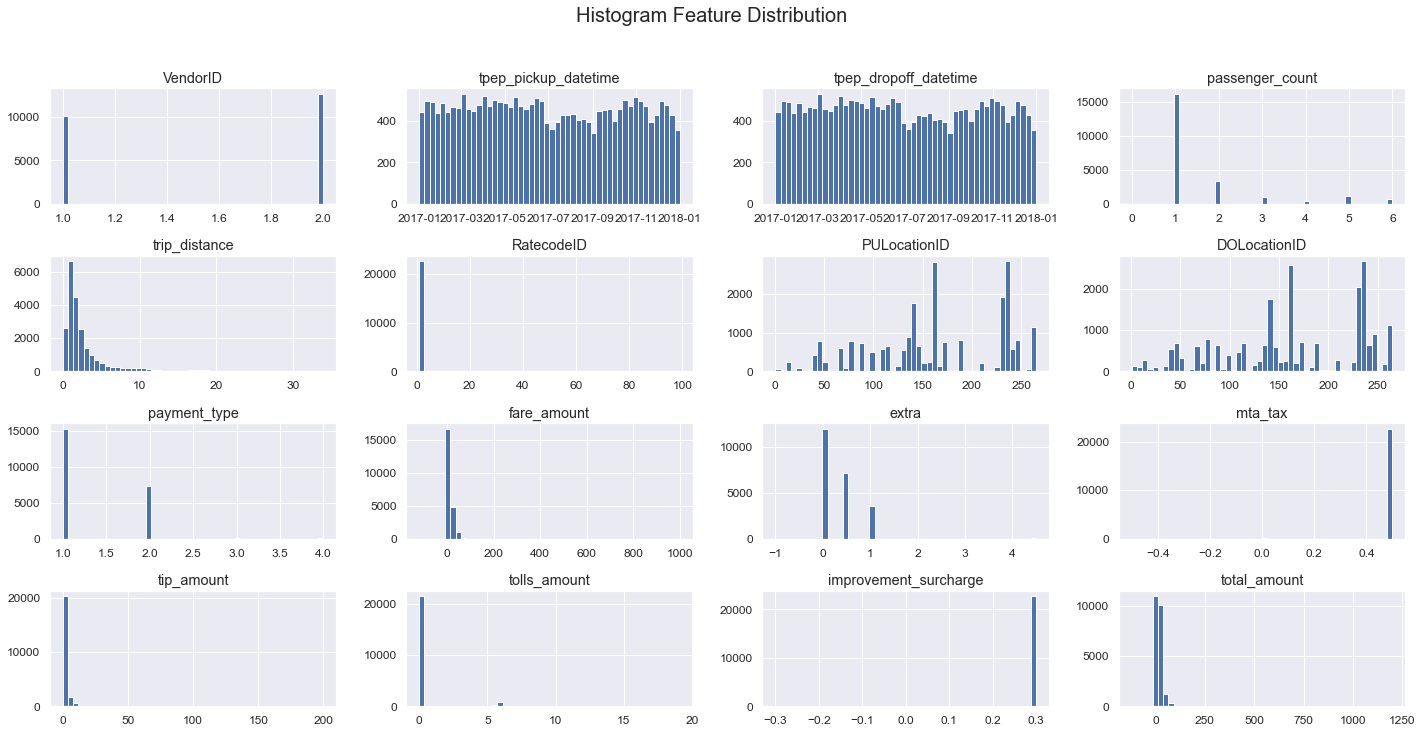

In [8]:
df.hist(bins=50, figsize=(20,10))
plt.suptitle('Histogram Feature Distribution', x=0.5, y=1.02, ha='center', fontsize=20)
plt.tight_layout()
plt.show()

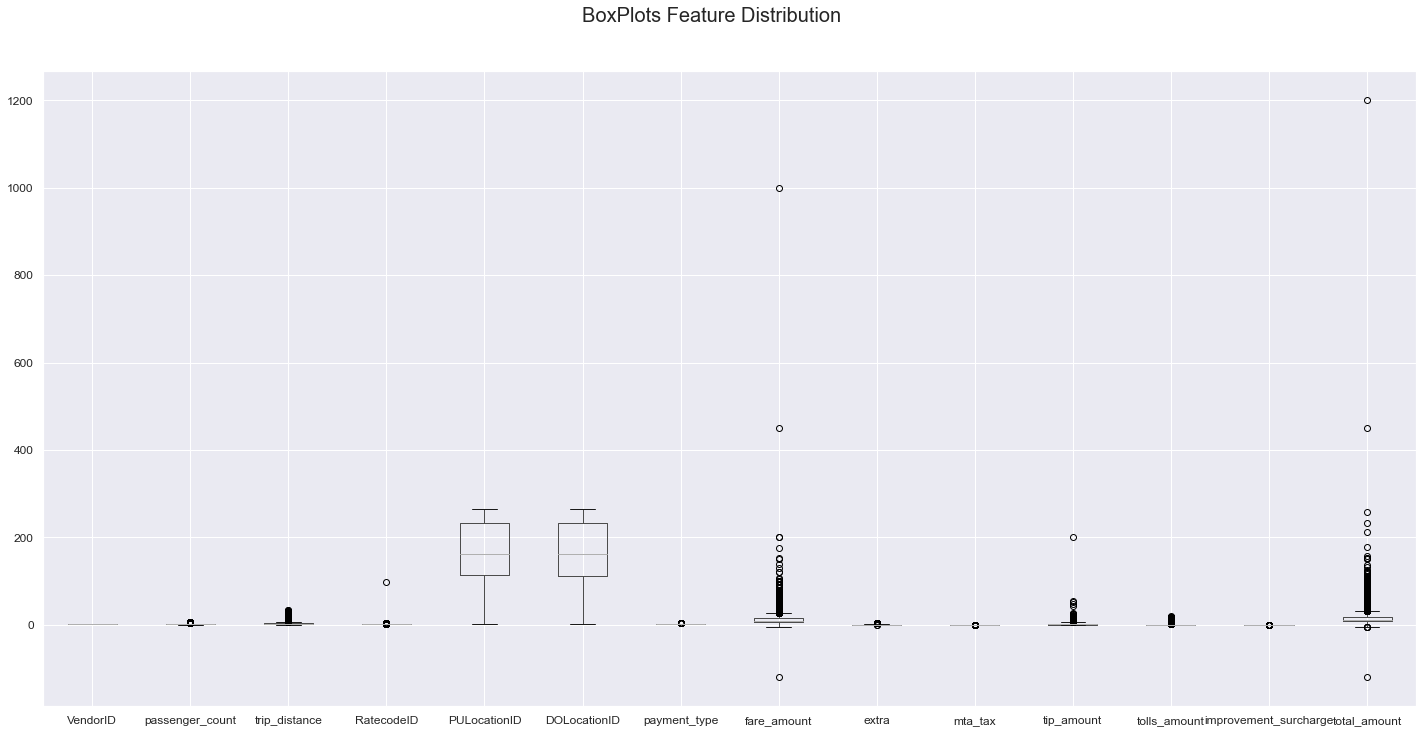

In [9]:
df.boxplot(figsize=(20,10))
plt.suptitle('BoxPlots Feature Distribution', x=0.5, y=1.02, ha='center', fontsize=20)
plt.tight_layout()
plt.show()

## Data Preprocessing

### Data Engineering

In [10]:
df["percentage"] = df["tip_amount"] / df["fare_amount"]

In [11]:
df["percentage"]

0       0.21
1       0.25
2       0.22
3       0.31
4       0.00
        ... 
22694   0.00
22695   0.28
22696   0.00
22697   0.16
22698   0.21
Name: percentage, Length: 22699, dtype: float64

In [12]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,percentage
0,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,1,13.00,0.00,0.50,2.76,0.00,0.30,16.56,0.21
1,1,2017-04-11 14:53:00,2017-04-11 15:19:00,1,1.80,1,N,186,43,1,16.00,0.00,0.50,4.00,0.00,0.30,20.80,0.25
2,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,1,6.50,0.00,0.50,1.45,0.00,0.30,8.75,0.22
3,2,2017-05-07 13:17:00,2017-05-07 13:48:00,1,3.70,1,N,188,97,1,20.50,0.00,0.50,6.39,0.00,0.30,27.69,0.31
4,2,2017-04-15 23:32:20,2017-04-15 23:49:03,1,4.37,1,N,4,112,2,16.50,0.50,0.50,0.00,0.00,0.30,17.80,0.00


In [13]:
# create a list of our conditions
conditions = [
    (df['percentage'] >= 0.2),
    (df['percentage'] < 0.2)
    ]

# create a list of the values we want to assign for each condition
values = [1, 0]

# create a new column and use np.select to assign values to it using our lists as arguments
df['tipper'] = np.select(conditions, values)

In [14]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,percentage,tipper
0,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,1,13.00,0.00,0.50,2.76,0.00,0.30,16.56,0.21,1
1,1,2017-04-11 14:53:00,2017-04-11 15:19:00,1,1.80,1,N,186,43,1,16.00,0.00,0.50,4.00,0.00,0.30,20.80,0.25,1
2,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,1,6.50,0.00,0.50,1.45,0.00,0.30,8.75,0.22,1
3,2,2017-05-07 13:17:00,2017-05-07 13:48:00,1,3.70,1,N,188,97,1,20.50,0.00,0.50,6.39,0.00,0.30,27.69,0.31,1
4,2,2017-04-15 23:32:20,2017-04-15 23:49:03,1,4.37,1,N,4,112,2,16.50,0.50,0.50,0.00,0.00,0.30,17.80,0.00,0


In [15]:
df["tipper"].value_counts()

0    11603
1    11096
Name: tipper, dtype: int64

### Drop unwanted features

In [16]:
df.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime', 'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag', 'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount', 'percentage', 'tipper'], dtype='object')

In [17]:
df.drop(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime', 'RatecodeID', 'store_and_fwd_flag', 
         'PULocationID', 'DOLocationID', 'payment_type', 'extra', 'mta_tax', 
         'tolls_amount', 'improvement_surcharge', 'total_amount', 'percentage'], axis=1, inplace=True)

In [18]:
df

,passenger_count,trip_distance,fare_amount,tip_amount,tipper
0,6,3.34,13.00,2.76,1
1,1,1.80,16.00,4.00,1
2,1,1.00,6.50,1.45,1
3,1,3.70,20.50,6.39,1
4,1,4.37,16.50,0.00,0
...,...,...,...,...,...
22694,3,0.61,4.00,0.00,0
22695,1,16.71,52.00,14.64,1
22696,1,0.42,4.50,0.00,0
22697,1,2.36,10.50,1.70,0


### Treat Missing Values

In [19]:
df.isnull().sum()

passenger_count    0
trip_distance      0
fare_amount        0
tip_amount         0
tipper             0
dtype: int64

### Treat Outliers

In [20]:
df.describe()

,passenger_count,trip_distance,fare_amount,tip_amount,tipper
count,22699.00,22699.00,22699.00,22699.00,22699.00
mean,1.64,2.91,13.03,1.84,0.49
std,1.29,3.65,13.24,2.80,0.50
min,0.00,0.00,-120.00,0.00,0.00
25%,1.00,0.99,6.50,0.00,0.00
50%,1.00,1.61,9.50,1.35,0.00
75%,2.00,3.06,14.50,2.45,1.00
max,6.00,33.96,999.99,200.00,1.00


In [21]:
windsorizer = Winsorizer(capping_method='gaussian', tail='left', fold= 0.01 , variables=['fare_amount'])

In [22]:
windsorizer.fit(df)

Winsorizer(fold=0.01, tail='left', variables=['fare_amount'])

In [23]:
df2 = windsorizer.transform(df)

In [24]:
df2

,passenger_count,trip_distance,fare_amount,tip_amount,tipper
0,6,3.34,13.00,2.76,1
1,1,1.80,16.00,4.00,1
2,1,1.00,12.89,1.45,1
3,1,3.70,20.50,6.39,1
4,1,4.37,16.50,0.00,0
...,...,...,...,...,...
22694,3,0.61,12.89,0.00,0
22695,1,16.71,52.00,14.64,1
22696,1,0.42,12.89,0.00,0
22697,1,2.36,12.89,1.70,0


In [25]:
df2.describe()

,passenger_count,trip_distance,fare_amount,tip_amount,tipper
count,22699.00,22699.00,22699.00,22699.00,22699.00
mean,1.64,2.91,16.60,1.84,0.49
std,1.29,3.65,11.75,2.80,0.50
min,0.00,0.00,12.89,0.00,0.00
25%,1.00,0.99,12.89,0.00,0.00
50%,1.00,1.61,12.89,1.35,0.00
75%,2.00,3.06,14.50,2.45,1.00
max,6.00,33.96,999.99,200.00,1.00


In [26]:
windsorizer.left_tail_caps_

{'fare_amount': 12.894194379060464}

In [27]:
windsorizer.right_tail_caps_

{}

In [28]:
df2.head()

,passenger_count,trip_distance,fare_amount,tip_amount,tipper
0,6,3.34,13.00,2.76,1
1,1,1.80,16.00,4.00,1
2,1,1.00,12.89,1.45,1
3,1,3.70,20.50,6.39,1
4,1,4.37,16.50,0.00,0


In [29]:
df2.groupby("tipper").mean()

,passenger_count,trip_distance,fare_amount,tip_amount
tipper,,,,
0,1.65,2.92,16.67,0.57
1,1.63,2.91,16.52,3.16


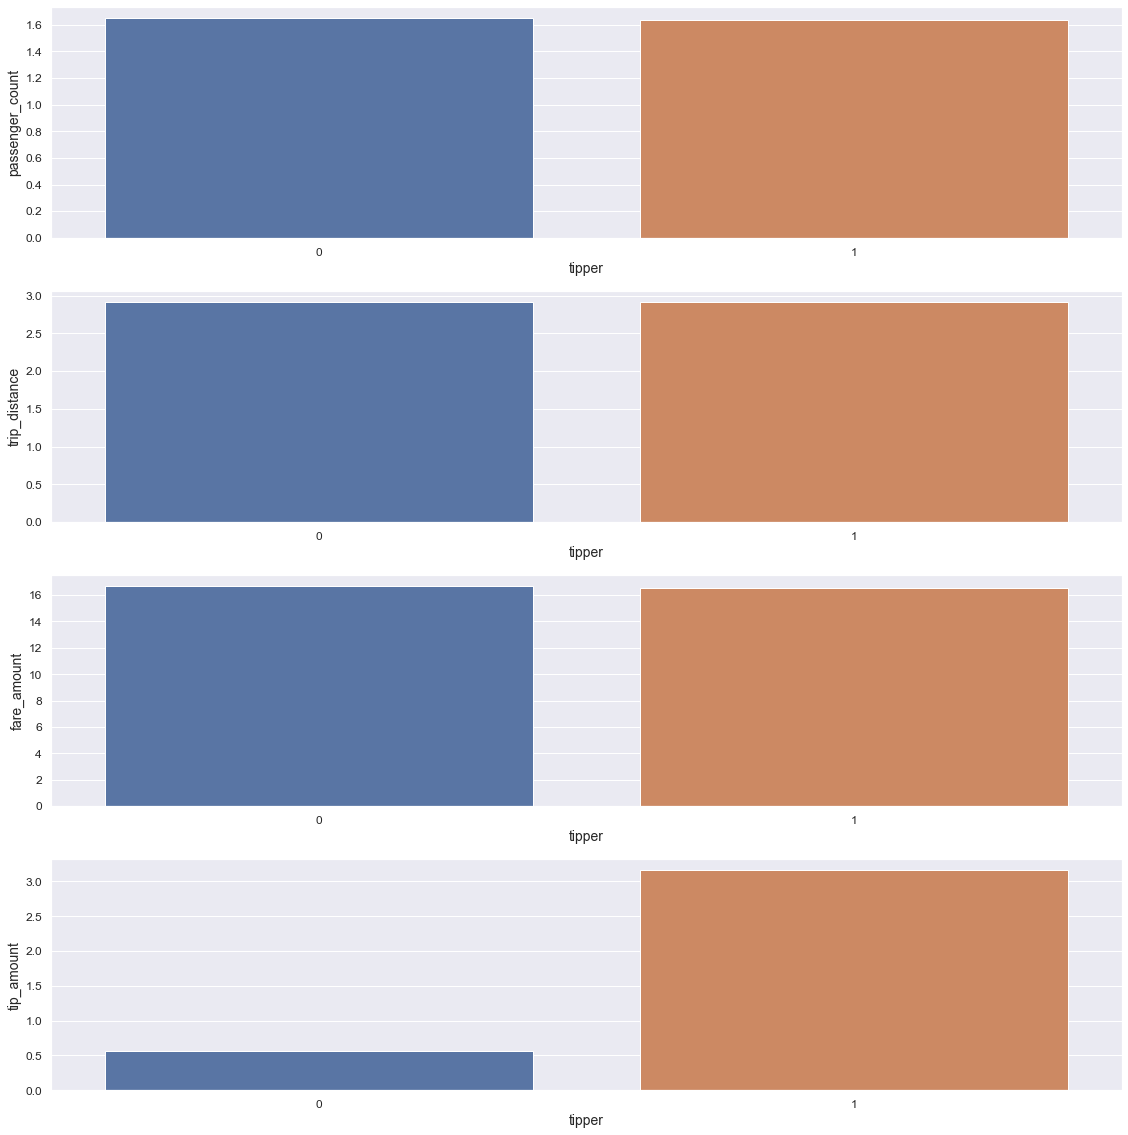

In [30]:
# Plot 4 rows and 1 column (can be expanded)

fig, ax = plt.subplots(4,1, sharex=False, figsize=(16,16))
#fig.suptitle('Main Title')


sns.barplot(x="tipper", y="passenger_count", data=df2, ci=None, ax=ax[0])
#ax[0].set_title('passenger_count')
#ax[0].tick_params('x', labelrotation=45)
ax[0].set_xlabel("tipper")
ax[0].set_ylabel("passenger_count")

sns.barplot(x="tipper", y="trip_distance", data=df2, ci=None, ax=ax[1])
#ax[1].set_title('Title of the second chart')
#ax[1].tick_params('x', labelrotation=45)
ax[1].set_xlabel("tipper")
ax[1].set_ylabel("trip_distance")

sns.barplot(x="tipper", y="fare_amount", data=df2, ci=None, ax=ax[2])
#ax[2].set_title('Title of the third chart')
#ax[2].tick_params('x', labelrotation=45)
ax[2].set_xlabel("tipper")
ax[2].set_ylabel("fare_amount")

sns.barplot(x="tipper", y="tip_amount", data=df2, ci=None, ax=ax[3])
#ax[3].set_title('Title of the fourth chart')
#ax[3].tick_params('x', labelrotation=45)
ax[3].set_xlabel("tipper")
ax[3].set_ylabel("tip_amount")

plt.tight_layout()
plt.show()


### Correlation

In [31]:
df2.corr()

,passenger_count,trip_distance,fare_amount,tip_amount,tipper
passenger_count,1.00,0.02,0.01,-0.01,-0.01
trip_distance,0.02,1.00,0.70,0.50,-0.00
fare_amount,0.01,0.70,1.00,0.67,-0.01
tip_amount,-0.01,0.50,0.67,1.00,0.46
tipper,-0.01,-0.00,-0.01,0.46,1.00


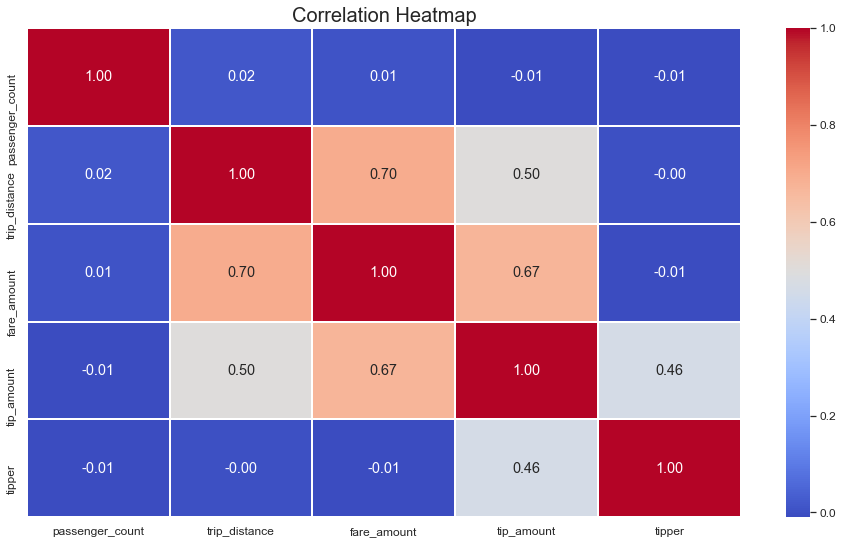

In [32]:
plt.figure(figsize=(16,9))
sns.heatmap(df2.corr(),cmap="coolwarm",annot=True,fmt='.2f',linewidths=2)
plt.title("Correlation Heatmap", fontsize=20)
plt.show()

### Create and save processed dataset

In [33]:
#df2.to_csv("taxi2.csv",index=False)

In [34]:
df2 = pd.read_csv("taxi2.csv")

In [35]:
df2.shape

(22699, 5)

In [36]:
df2 = df2.sample(n=10000, random_state=0)

In [37]:
df2.shape

(10000, 5)

### Train Test Split

In [38]:
X = df2.iloc[:,:4]
y = df2.iloc[:,4]

In [39]:
df2.shape

(10000, 5)

In [40]:
X.values, y.values

(array([[ 1.        ,  3.09      , 14.        ,  2.5       ],
        [ 1.        ,  4.1       , 28.        ,  0.        ],
        [ 2.        ,  0.72      , 12.89419438,  1.26      ],
        ...,
        [ 1.        ,  0.39      , 12.89419438,  1.16      ],
        [ 1.        ,  0.88      , 12.89419438,  1.76      ],
        [ 1.        ,  2.3       , 12.89419438,  3.05      ]]),
 array([0, 0, 1, ..., 1, 1, 1], dtype=int64))

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [42]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((8000, 4), (2000, 4), (8000,), (2000,))

## Feature Scaling

In [43]:
X_train

,passenger_count,trip_distance,fare_amount,tip_amount
6226,1,0.99,12.89,2.04
11442,1,1.24,12.89,0.00
1541,1,0.30,12.89,1.25
19971,2,8.20,25.50,6.70
11934,1,0.50,12.89,0.00
...,...,...,...,...
11304,1,11.59,35.00,0.00
18015,1,1.00,12.89,1.95
18901,5,1.03,12.89,0.70
13167,1,1.13,12.89,1.50


In [44]:
scaler = StandardScaler()

In [45]:
X_train_scaled = scaler.fit_transform(X_train)

In [46]:
X_test_scaled = scaler.transform(X_test)

In [47]:
X_train_scaled

array([[-0.49631658, -0.52979762, -0.39322071,  0.09320494],
       [-0.49631658, -0.46066625, -0.39322071, -0.74491541],
       [-0.49631658, -0.72060022, -0.39322071, -0.23136128],
       ...,
       [ 2.61782665, -0.5187366 , -0.39322071, -0.4573251 ],
       [-0.49631658, -0.49108405, -0.39322071, -0.12865045],
       [ 1.06075504, -0.60722476, -0.39322071, -0.18616851]])

In [48]:
X_test_scaled

array([[-0.49631658, -0.72060022, -0.39322071, -0.39159017],
       [-0.49631658,  0.24723903,  0.59163665, -0.74491541],
       [ 0.28221923, -0.58233747, -0.39322071, -0.23136128],
       ...,
       [ 3.39636246, -0.56851119, -0.39322071,  0.00281941],
       [-0.49631658,  0.05920169, -0.27362   , -0.3340721 ],
       [ 0.28221923,  0.18916867,  3.62003492,  3.3881683 ]])

## Model Training

### Using Classification Models

In [49]:
model = RandomForestClassifier(random_state=0)

In [50]:
model.fit(X_train_scaled,y_train)

RandomForestClassifier(random_state=0)

In [51]:
y_pred = model.predict(X_test_scaled)

In [52]:
y_pred

array([1, 0, 1, ..., 1, 0, 1], dtype=int64)

### Using RandomSearchCV

In [53]:
parameters = {'n_estimators':np.arange(100,1000,100),
    
              'criterion': ('gini','entropy'),
              'max_depth': np.arange(2,10,1),
              
              'min_samples_leaf': np.arange(1,5,1)
              
             }

In [54]:
randm = RandomizedSearchCV(estimator=model, param_distributions = parameters, cv = 5, n_iter = 10, 
                           n_jobs=-1, scoring='f1')

In [55]:
randm.fit(X_train_scaled, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0),
                   n_jobs=-1,
                   param_distributions={'criterion': ('gini', 'entropy'),
                                        'max_depth': array([2, 3, 4, 5, 6, 7, 8, 9]),
                                        'min_samples_leaf': array([1, 2, 3, 4]),
                                        'n_estimators': array([100, 200, 300, 400, 500, 600, 700, 800, 900])},
                   scoring='f1')

In [56]:
randm.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=9, random_state=0)

In [57]:
randm.best_score_

0.9697631745253033

In [58]:
randm.best_params_

{'n_estimators': 100,
 'min_samples_leaf': 1,
 'max_depth': 9,
 'criterion': 'entropy'}

In [59]:
model2 = RandomForestClassifier(n_estimators=100, min_samples_leaf=1, max_depth=9, criterion="entropy", random_state=0)

In [60]:
model2.fit(X_train_scaled,y_train)

RandomForestClassifier(criterion='entropy', max_depth=9, random_state=0)

In [61]:
y_pred2 = model2.predict(X_test_scaled)

In [62]:
y_pred2

array([1, 0, 1, ..., 1, 0, 1], dtype=int64)

### Model Evaluation

In [63]:
cm = confusion_matrix(y_test,y_pred2)
cm

array([[960,  38],
       [ 12, 990]], dtype=int64)

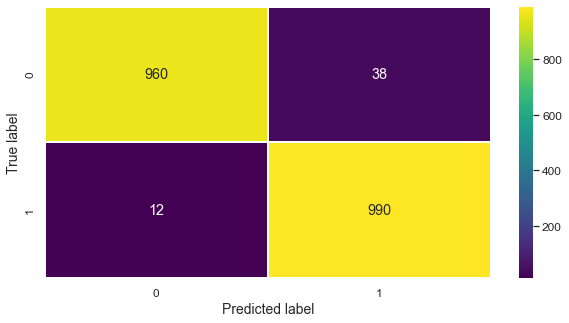

In [64]:
fig , ax = plt.subplots(figsize=(10,5))
sns.heatmap(cm, annot=True,fmt='.4g',linewidths=2, cmap='viridis')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [65]:
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           0       0.99      0.96      0.97       998
           1       0.96      0.99      0.98      1002

    accuracy                           0.97      2000
   macro avg       0.98      0.97      0.97      2000
weighted avg       0.98      0.97      0.97      2000



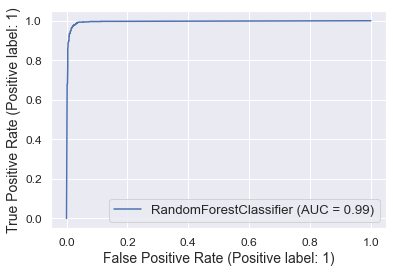

In [66]:
plot_roc_curve(model,X_test_scaled,y_test)
plt.show()

In [67]:
model2.feature_importances_

array([0.00504061, 0.1086965 , 0.04458721, 0.84167568])

In [68]:
feat_importances = pd.Series(model2.feature_importances_, index=X.columns)

In [69]:
feat_importances

passenger_count   0.01
trip_distance     0.11
fare_amount       0.04
tip_amount        0.84
dtype: float64

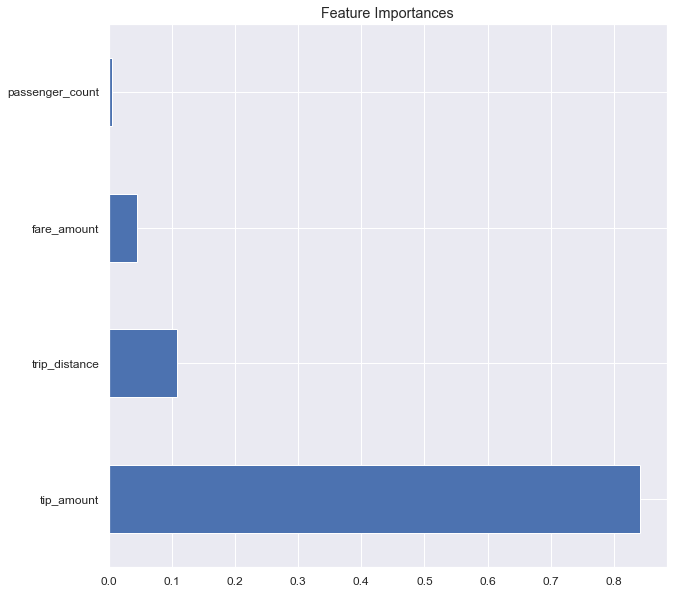

In [70]:
feat_importances.nlargest(10).plot(kind='barh', figsize=(10,10))
plt.title('Feature Importances')
plt.show()

### Table Formatted View

In [71]:
table = X_test.copy()

In [72]:
table["True Value"] = y_test.copy()

In [73]:
table["Predicted"] = np.round(y_pred2,2)

In [74]:
table

,passenger_count,trip_distance,fare_amount,tip_amount,True Value,Predicted
18785,1,0.30,12.89,0.86,1,1
18616,1,3.80,22.00,0.00,0,0
11576,2,0.80,12.89,1.25,1,1
19840,1,2.50,12.89,1.00,0,0
5527,1,1.37,12.89,0.00,0,0
...,...,...,...,...,...,...
5118,1,1.60,12.89,2.15,1,1
20537,1,1.90,12.89,2.15,1,1
7077,6,0.85,12.89,1.82,1,1
7763,1,3.12,14.00,1.00,0,0


### Cross-Validation

In [75]:
cv = cross_val_score(model2,X,y,cv=5,verbose=1,scoring='accuracy')

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    2.5s finished


In [76]:
cv.mean()

0.9728

#### Python code done by Dennis Lam